# Import and load data

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()


# Normalize pixel values (0–255 → 0–1)
X_train, X_test = X_train / 255.0, X_test / 255.0


# Add channel dimension for CNN input (28x28x1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)


# Build the CNN model using sequential API

In [6]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax') # 10 classes (digits 0–9)
])


# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# 3) Compile the model

In [8]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

# 4) Train the model

In [9]:
history = model.fit(
X_train, y_train,
epochs=5,
validation_data=(X_test, y_test),
verbose=1
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 121s 62ms/step - accuracy: 0.9627 - loss: 0.1229 - val_accuracy: 0.9810 - val_loss: 0.0600
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 121s 64ms/step - accuracy: 0.9863 - loss: 0.0426 - val_accuracy: 0.9900 - val_loss: 0.0280
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 122s 65ms/step - accuracy: 0.9912 - loss: 0.0274 - val_accuracy: 0.9903 - val_loss: 0.0290
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 135s 72ms/step - accuracy: 0.9930 - loss: 0.0209 - val_accuracy: 0.9901 - val_loss: 0.0323
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 125s 67ms/step - accuracy: 0.9950 - loss: 0.0153 - val_accuracy: 0.9888 - val_loss: 0.0358


# 5) Evaluate performance


✅ Test Accuracy: 98.88%


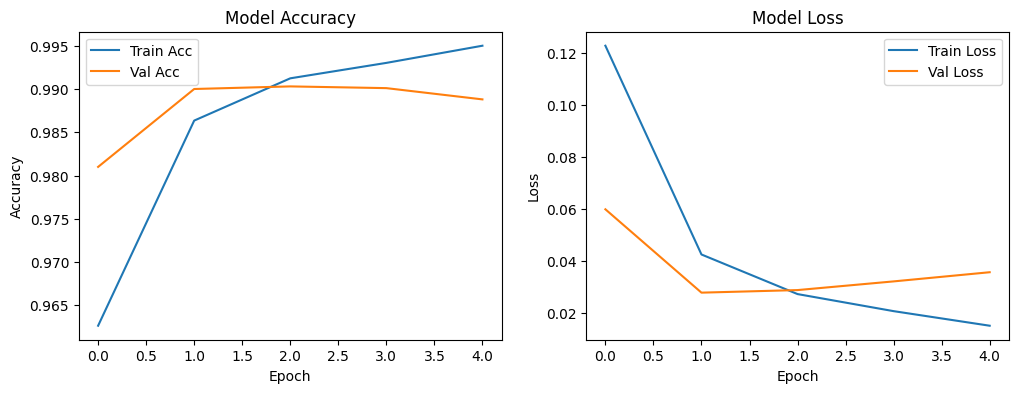

In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")


# Plot accuracy and loss curves
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 6) Visualize predictions on 5 random samples

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step


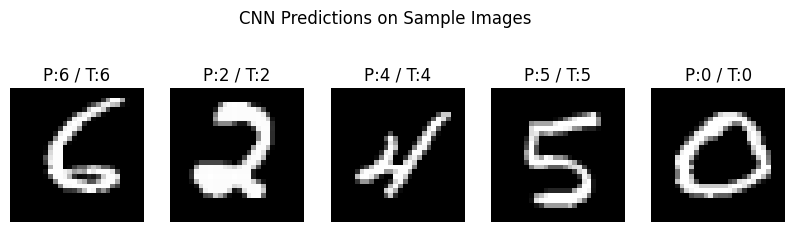

In [12]:
indices = np.random.choice(len(X_test), 5)
sample_images = X_test[indices]
sample_labels = y_test[indices]


predictions = np.argmax(model.predict(sample_images), axis=1)


plt.figure(figsize=(10,3))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(sample_images[i].reshape(28,28), cmap='gray')
    plt.title(f"P:{predictions[i]} / T:{sample_labels[i]}")
    plt.axis('off')
plt.suptitle('CNN Predictions on Sample Images')
plt.show()

# 7) Save the trained model

In [13]:
model.save('mnist_model.h5')
print("Model saved as mnist_model.h5")

Model saved as mnist_model.h5


# Make individual predictions

In [ ]:
new_sample = X_test[0].reshape(1,28,28,1)
probabilities = model.predict(new_sample)
print("Predicted class:", np.argmax(probabilities))